# PCA to reduce the shape of the image

We are going to compress a facial image dataset using PCA.  
We will use the Olivetti face image dataset, available in scikit-learn.

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
from sklearn.decomposition import PCA 

In [4]:
from sklearn.datasets import fetch_olivetti_faces
faces=fetch_olivetti_faces() 

In [5]:
print(faces.keys())

dict_keys(['data', 'images', 'target', 'DESCR'])


In [7]:
#print the no. of images and total pixels in each image
print(faces.data.shape)

(400, 4096)


There are 400 images and each has 64 x 64 (4096) pixels

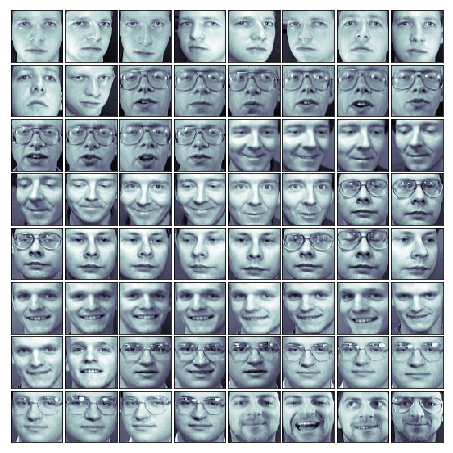

In [17]:
#Setup a figure 6 inches by 6 inches 
fig = plt.figure(figsize=(6,6)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, 
                    hspace=0.05, wspace=0.05)

# plot the faces, each image is 64 by 64 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1,xticks=[], yticks=[])
    ax.imshow(faces.images[i],cmap=plt.cm.bone,
              interpolation='nearest')
plt.show() 

In [19]:
print(faces.data)

[[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]
 [0.45454547 0.47107437 0.5123967  ... 0.15289256 0.15289256 0.15289256]
 [0.3181818  0.40082645 0.49173555 ... 0.14049587 0.14876033 0.15289256]
 ...
 [0.5        0.53305787 0.607438   ... 0.17768595 0.14876033 0.19008264]
 [0.21487603 0.21900827 0.21900827 ... 0.57438016 0.59090906 0.60330576]
 [0.5165289  0.46280992 0.28099173 ... 0.35950413 0.3553719  0.38429752]]


In [20]:
print(faces.target)

[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 32

In [27]:
#Let's see how much of the variance is 
#retained if we compressed these down to a 8x8 (64) pixel images.
#Fitting PCA to the dataset and
#transforming it into 64 principal components
x,y=faces.data, faces.target 
pca_faces = PCA(64) 
x_proj = pca_faces.fit_transform(x)
print (x_proj.shape)

(400, 64)


In [28]:
#this tells us the extent to which each component explains 
#the original dataset. so the 1st component is able 
#to explain ~23% of x and the second only about 38% 
#Together they can explain about 61% of the variance of X 
print (np.cumsum(pca_faces.explained_variance_ratio_))

[0.23812726 0.37806702 0.45775312 0.50773644 0.5438349  0.57540435
 0.5996727  0.62003666 0.6396178  0.656339   0.6722912  0.686661
 0.6991284  0.7105997  0.7212285  0.73100567 0.7401963  0.748352
 0.7558907  0.76336056 0.77034634 0.7764926  0.7823319  0.78802913
 0.79349107 0.7988096  0.80394775 0.80890614 0.81348276 0.8178946
 0.82191455 0.8257564  0.8293758  0.8327209  0.83592427 0.8390843
 0.84213525 0.8451211  0.84794205 0.8506811  0.85327816 0.8558155
 0.8582597  0.86065704 0.8629623  0.8652234  0.8674442  0.8696435
 0.87172675 0.87376803 0.87573296 0.8776346  0.8794699  0.8812524
 0.8830075  0.88470733 0.88637334 0.88799226 0.8895809  0.8911206
 0.8926401  0.89413315 0.895598   0.8970391 ]


In [29]:
#means we can retain about ~90% of variance by compressing it to 64
print (np.sum(pca_faces.explained_variance_ratio_))

0.89703906


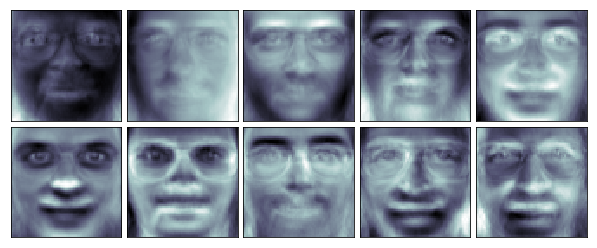

In [33]:
plotting the new reduced dataset
#Setup a figure 8 inches by 8 inches 
fig = plt.figure(figsize=(8,8)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 

# plot the faces, each image is 64 by 64 pixels 
for i in range(10): 
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[]) 
    ax.imshow(np.reshape(pca_faces.components_[i,:], (64,64)), cmap=plt.cm.bone, interpolation='nearest')

In [34]:
#now we will try to reconstruct the images using this reduced dataset
#we will inverse tranform the 8x8 images back to 64x64 dimension
#we are not reverting back to original data
#just going back to the actual dimension to visualise it

x_inv_proj = pca_faces.inverse_transform(x_proj)
#reshaping as 400 images of 64x64 dimension 
x_proj_img = np.reshape(x_inv_proj,(400,64,64))

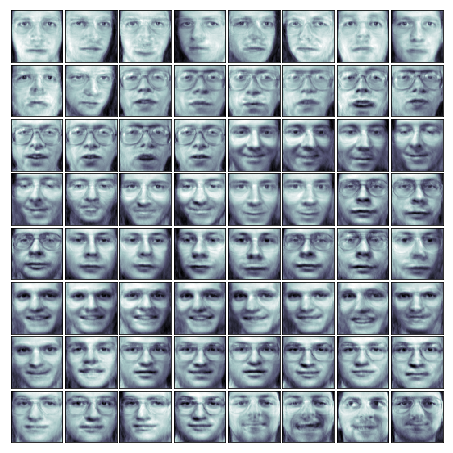

In [36]:
#Setup a figure 6 inches by 6 inches
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, 
                    top=1, hspace=0.05, wspace=0.05)
# plot the faces, each image is 64 by 64 dimension but 8x8 pixels 
for i in range(64): 
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[]) 
    ax.imshow(x_proj_img[i], cmap=plt.cm.bone, interpolation='nearest')

The image looks good but the finer details are missing as we have reduced the dimensionality by 64 times.

# Now we will use an image from web and reduce its dimension

In [66]:
import matplotlib.image as mpimg

In [38]:
img=mpimg.imread("cat.jpg")

(-0.5, 719.5, 719.5, -0.5)

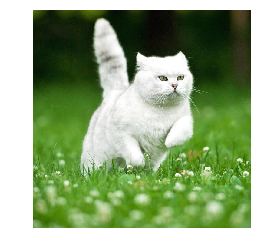

In [46]:
plt.imshow(img)
plt.axis("off")

In [39]:
#print size of the numpy array object
print(img.shape)

(720, 720, 3)


so the array has 720 rows each of pixel 720x3. We will reshape into a format that PCA can understand.
720*3=2160

In [40]:
img_r=np.reshape(img,(720,2160))
print(img_r.shape)

(720, 2160)


In [72]:
#now we will run the PCA with 64 componenets(8x8) 
#and tranform the image
pca1=PCA(64).fit(img_r)
img_c=pca1.transform(img_r)
print(np.sum(pca1.explained_variance_ratio_))

0.9955587101661986


with 64 components we can get ~99.5% variance

In [73]:
#now inverse tranform the pca output and reshape
temp=pca1.inverse_transform(img_c)
print(temp.shape)

#reshaping 2160 back to original 720*3
temp=np.reshape(temp,(720,720,3))
print(temp.shape)

(720, 2160)
(720, 720, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


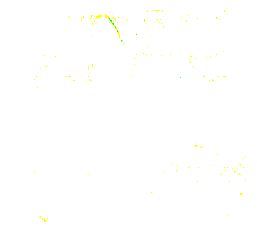

In [74]:
#now we will visualise the new reduced image
plt.axis("off")
plt.imshow(temp)